<a href="https://colab.research.google.com/github/SkyyRon/yolov10-fastapi-deployment/blob/master/trafficdensity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 105.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
# Standard libraries
import os
import shutil
import math

# Numerical and data handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Image and video processing
import cv2
from PIL import Image

# YAML file handling
import yaml

# Model - YOLOv10 (from ultralytics)
from ultralytics import YOLO

# Jupyter display tools
from IPython.display import Video, display


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
pip install pyyaml


In [ ]:
sns.set_theme(
    style='darkgrid',
    rc={
        'axes.facecolor': '#f5f5ff',      # Light lavender background
        'figure.facecolor': '#ffffff',   # White background for figures
        'axes.edgecolor': '#4a4a4a',     # Darker axis borders
        'grid.color': '#ccccff',         # Softer grid color
        'axes.labelcolor': '#333333',    # Axis label color
        'xtick.color': '#444444',
        'ytick.color': '#444444',
        'font.family': 'sans-serif',
        'font.sans-serif': 'DejaVu Sans',
    }
)



In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("farzadnekouei/top-view-vehicle-detection-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/top-view-vehicle-detection-image-dataset


In [ ]:
dataset_path = '/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset'

# Set the path to the YAML file
yaml_file_path = os.path.join(dataset_path, 'data.yaml')

# Load and print the contents of the YAML file
with open(yaml_file_path, 'r') as file:
    yaml_content = yaml.load(file, Loader=yaml.FullLoader)
    print(yaml.dump(yaml_content, default_flow_style=False))

names:
- Vehicle
nc: 1
roboflow:
  license: CC BY 4.0
  project: vehicle_detection_yolov8
  url: https://universe.roboflow.com/farzad/vehicle_detection_yolov8/dataset/3
  version: 3
  workspace: farzad
train: ../train/images
val: ../valid/images



In [ ]:
# Set paths for training and validation image sets
train_images_path = os.path.join(dataset_path, 'train', 'images')
valid_images_path = os.path.join(dataset_path, 'valid', 'images')

# Initialize counters for the number of images
num_train_images = 0
num_valid_images = 0

# Initialize sets to hold the unique sizes of images
train_image_sizes = set()
valid_image_sizes = set()

# Check train images sizes and count
for filename in os.listdir(train_images_path):
    if filename.endswith('.jpg'):
        num_train_images += 1
        image_path = os.path.join(train_images_path, filename)
        with Image.open(image_path) as img:
            train_image_sizes.add(img.size)

# Check validation images sizes and count
for filename in os.listdir(valid_images_path):
    if filename.endswith('.jpg'):
        num_valid_images += 1
        image_path = os.path.join(valid_images_path, filename)
        with Image.open(image_path) as img:
            valid_image_sizes.add(img.size)

# Print the results
print(f"Number of training images: {num_train_images}")
print(f"Number of validation images: {num_valid_images}")

# Check if all images in training set have the same size
if len(train_image_sizes) == 1:
    print(f"All training images have the same size: {train_image_sizes.pop()}")
else:
    print("Training images have varying sizes.")

# Check if all images in validation set have the same size
if len(valid_image_sizes) == 1:
    print(f"All validation images have the same size: {valid_image_sizes.pop()}")
else:
    print("Validation images have varying sizes.")

Number of training images: 536
Number of validation images: 90
All training images have the same size: (640, 640)
All validation images have the same size: (640, 640)


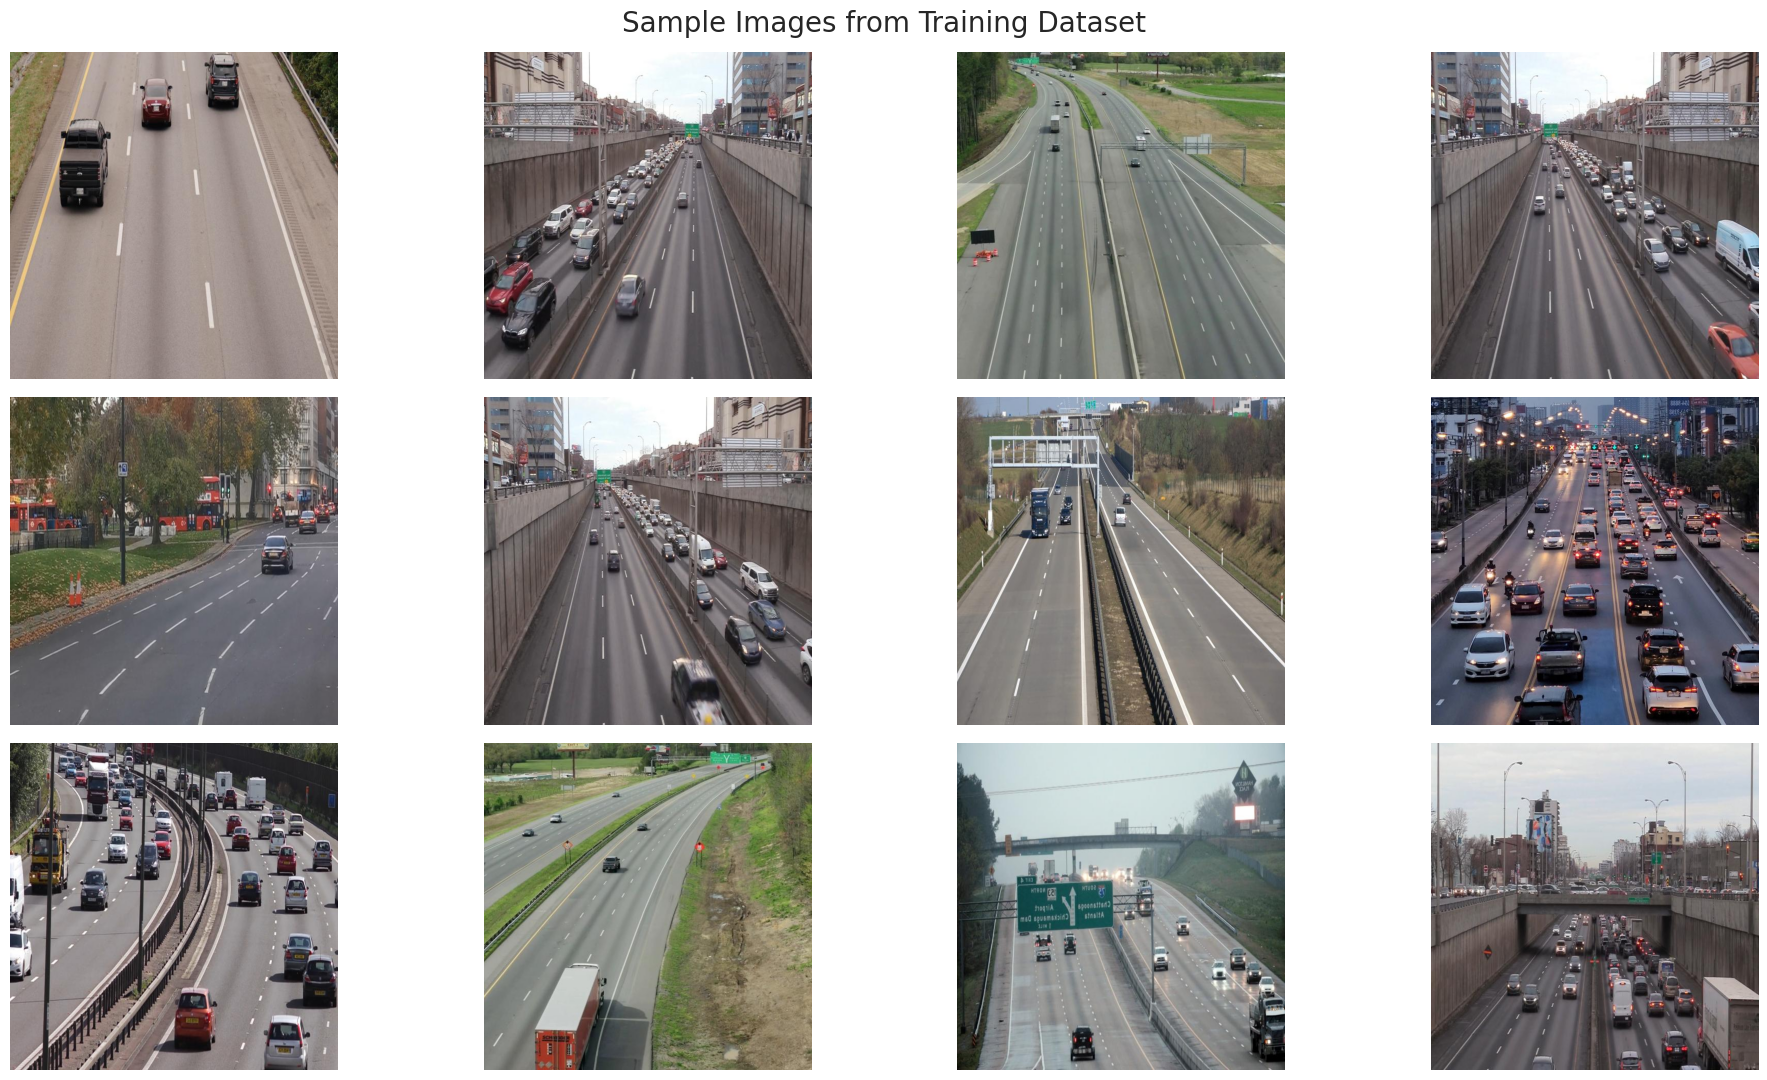

In [ ]:
# List all jpg images in the directory
image_files = [file for file in os.listdir(train_images_path) if file.endswith('.jpg')]

# Select 8 images at equal intervals
num_images = len(image_files)
selected_images = [image_files[i] for i in range(0, num_images, num_images // 12)]

# Create a 2x4 subplot
fig, axes = plt.subplots(3, 4, figsize=(20, 11))

# Display each of the selected images
for ax, img_file in zip(axes.ravel(), selected_images):
    img_path = os.path.join(train_images_path, img_file)
    image = Image.open(img_path)
    ax.imshow(image)
    ax.axis('off')

plt.suptitle('Sample Images from Training Dataset', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
model = YOLO("yolov10n.pt")


100%|██████████| 5.59M/5.59M [00:00<00:00, 118MB/s]


In [ ]:
model.fuse()


YOLOv10n summary (fused): 102 layers, 2,299,264 parameters, 0 gradients, 6.7 GFLOPs


In [ ]:
results = model.train(
    data=yaml_file_path,  # path to data.yaml
    epochs=100,
    imgsz=640,
    #device=0,
    patience=50,
    batch=32,
    optimizer='AdamW',
    lr0=0.001,
    lrf=0.1,
    dropout=0.1,
    seed=0
)


Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (AMD EPYC 7B12)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov10n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, pa

100%|██████████| 755k/755k [00:00<00:00, 25.6MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytics

YOLOv10n summary: 223 layers, 2,707,430 parameters, 2,707,414 gradients, 8.4 GFLOPs

Transferred 73/595 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
train: Fast image access ✅ (ping: 0.3±0.1 ms, read: 155.7±45.8 MB/s, size: 57.5 KB)


train: Scanning /kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/train/labels... 536 images, 0 backgrounds, 0 corrupt: 100%|██████████| 536/536 [00:04<00:00, 126.70it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.4±0.0 ms, read: 152.4±21.3 MB/s, size: 57.6 KB)


val: Scanning /kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/valid/labels... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<00:00, 126.88it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      7.469      8.596      6.172        414        640:   6%|▌         | 1/17 [00:41<10:58, 41.15s/it]


KeyboardInterrupt: 

In [ ]:
import os

base_path = '/content/runs/detect'
print("All training runs:")
print(os.listdir(base_path))


In [ ]:
# List contents of the 'train' folder inside 'detect'
train_dir = '/content/runs/detect/train2'
print(f"Contents of {train_dir}:")
print(os.listdir(train_dir))


In [ ]:
import pandas as pd

# Path to the results.csv file
results_csv_path = '/content/runs/detect/train2/results.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(results_csv_path)

# Remove leading whitespace from column names
df.columns = df.columns.str.strip()

df.head()


In [ ]:

base_path = '/content/runs/detect/train2'

# plotting learning curves
results_csv_path = os.path.join(base_path, 'results.csv')
df = pd.read_csv(results_csv_path)
df.columns = df.columns.str.strip()

import cv2
import matplotlib.pyplot as plt

conf_matrix_path = os.path.join(base_path, 'confusion_matrix_normalized.png')
cm_img = cv2.imread(conf_matrix_path)
cm_img = cv2.cvtColor(cm_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(cm_img)
plt.axis('off')
plt.title("Normalized Confusion Matrix")
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


results_csv_path = '/content/runs/detect/train2/results.csv'

# Load and clean
df = pd.read_csv(results_csv_path)
df.columns = df.columns.str.strip()


def plot_learning_curve(df, train_loss_col, val_loss_col, title):
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df, x='epoch', y=train_loss_col, label='Train', linewidth=2)
    sns.lineplot(data=df, x='epoch', y=val_loss_col, label='Validation', linewidth=2, linestyle='--')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_learning_curve(df, 'train/box_loss', 'val/box_loss', 'Box Loss')
plot_learning_curve(df, 'train/cls_loss', 'val/cls_loss', 'Classification Loss')
plot_learning_curve(df, 'train/dfl_loss', 'val/dfl_loss', 'Distribution Focal Loss')


In [ ]:
# Construct the path to the best model weights file using os.path.join
best_model_path = os.path.join(base_path, 'weights/best.pt')

best_model = YOLO(best_model_path)

metrics = best_model.val(split='val')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Construct the path to the best model weights file
best_model_path = os.path.join(base_path, 'weights/best.pt')

# Path to save the model in Google Drive
drive_model_path = "/content/drive/MyDrive/yolov10_best_model.pt"

# Copy the best model weights to Google Drive
!cp {best_model_path} {drive_model_path}

print(f"Model saved to Google Drive at {drive_model_path}")


In [ ]:
# Convert the dictionary to a pandas DataFrame and use the keys as the index
metrics_df = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])

# Display the DataFrame
metrics_df.round(3)

In [ ]:
from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Copy the results.csv to your Drive
shutil.copy('runs/detect/train2/results.csv', '/content/drive/MyDrive/results.csv')


#TESTING ON AN IMAGE

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
def check_traffic_density(image_path, model):

    from PIL import Image
    import matplotlib.pyplot as plt
    import os

    # Inference
    results = model(image_path)

    # Count vehicles
    num_vehicles = len(results[0].boxes)

    # Determine traffic density
    if num_vehicles >= 20:
        density = "High"
    elif num_vehicles >= 10:
        density = "Medium"
    else:
        density = "Low"

    # Show result with bounding boxes
    results[0].show()

    # Print summary
    print(f"\nImage: {os.path.basename(image_path)}")
    print(f"Detected {num_vehicles} vehicles → Traffic Density: {density}")

    # Access prediction data (boxes, labels, scores)
    predicted_boxes = results[0].boxes.xywh  # predicted bounding boxes in xywh format
    predicted_scores = results[0].boxes.conf  # confidence scores
    predicted_labels = results[0].boxes.cls  # predicted class labels (vehicle, etc.)


    print(f"Predicted boxes: {predicted_boxes}")
    print(f"Confidence scores: {predicted_scores}")
    print(f"Predicted labels: {predicted_labels}")
    print(f"Number of detected vehicles: {num_vehicles}")


In [ ]:

model = YOLO(best_model_path)

# Get the uploaded image name
image_path = list(uploaded.keys())[0]

check_traffic_density(image_path, model)
